<a href="https://colab.research.google.com/github/buseakyuz/RenewableEnergyDataAnlysis/blob/main/RenewableEnergy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Veriyi Yükleme



In [45]:
url = 'https://raw.githubusercontent.com/buseakyuz/RenewableEnergyDataAnlysis/main/Renewable_Energy.csv'

data = pd.read_csv(url)

data.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Technology,Energy_Type,Unit,Source,CTS_Name,...,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022,F2023
0,1,Advanced Economies,NaN,AETMP,Electricity Generation,Bioenergy,Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,...,250919.577,263542.750,274561.810,281658.673,286653.446,292379.608,294178.354,306827.472,297837.826,NaN
1,2,Advanced Economies,NaN,AETMP,Electricity Installed Capacity,Bioenergy,Total Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,...,48343.151,50522.206,52940.018,55311.101,58206.997,59946.258,60789.850,59564.440,60934.763,62146.697
2,3,Advanced Economies,NaN,AETMP,Electricity Generation,Fossil fuels,Total Non-Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,...,5957377.370,5895105.081,5863974.474,5730416.734,5785386.448,5546081.830,5240196.496,5401739.239,5387109.662,NaN
3,4,Advanced Economies,NaN,AETMP,Electricity Installed Capacity,Fossil fuels,Total Non-Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,...,1542498.011,1516740.809,1503912.875,1501356.722,1512610.754,1485733.713,1477595.925,1476335.267,1470127.235,1464243.522
4,5,Advanced Economies,NaN,AETMP,Electricity Generation,Hydropower (excl. Pumped Storage),Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,...,1250083.974,1229010.224,1243652.987,1271436.807,1270052.391,1244244.740,1276615.396,1236759.800,1188216.136,NaN


# Yapısal Analiz ve Veri Kontrolü

In [47]:
# 1. Veri setinin boyutlarını görelim (Satır, Sütun)
print(f"Veri Seti Boyutu: {data.shape}\n")
print("-" * 50)

# 2. Sütun isimleri, veri tipleri ve dolu veri sayısını inceleyelim
data.info()
print("-" * 50)

# 3. İstatistiksel özet (Sayısal sütunların dağılımı)
# Bu kısım; ortalama, standart sapma, min/max değerlerine bakarak 'anormallik' (outlier) sezmek içindir.
print("İstatistiksel Özet:\n")
print(data.describe().T) # .T ile transpoze ettik, okuması daha kolay olur.
print("-" * 50)

# 4. Eksik veri (Null/NaN) kontrolü
print("Eksik Değer Sayıları:\n")
print(data.isnull().sum())
print("-" * 50)

# 5. Tekrar eden satır (Duplicate) kontrolü
print(f"Tekrar eden satır sayısı: {data.duplicated().sum()}")

Veri Seti Boyutu: (2062, 36)

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             2062 non-null   int64  
 1   Country              2062 non-null   object 
 2   ISO2                 1790 non-null   object 
 3   ISO3                 2062 non-null   object 
 4   Indicator            2062 non-null   object 
 5   Technology           2062 non-null   object 
 6   Energy_Type          2062 non-null   object 
 7   Unit                 2062 non-null   object 
 8   Source               2062 non-null   object 
 9   CTS_Name             2062 non-null   object 
 10  CTS_Code             2062 non-null   object 
 11  CTS_Full_Descriptor  2062 non-null   object 
 12  F2000                1414 non-null   float64
 13  F2001                1444 non-null   float64
 14  F2002  

**Veri Temizliği**

In [20]:
# 1. ObjectId ve Eksik verili F2023 sütununu baştan atıyoruz

df_clean = data.drop(columns=['ObjectId', 'F2023'])

# 2. Wide to Long Format (Yataydan Dikeye Dönüşüm)
id_vars = ['Country', 'ISO2', 'ISO3', 'Indicator', 'Technology', 'Energy_Type',
           'Unit', 'Source', 'CTS_Name', 'CTS_Code', 'CTS_Full_Descriptor']
# melt işlemi
df_melted = df_clean.melt(id_vars=id_vars, var_name='Year', value_name='Value')

# 3. Yıl Sütununu Temizleme ('F2000' -> 2000)
df_melted['Year'] = df_melted['Year'].str.replace('F', '').astype(int)

# 4. Değeri (Value) Boş Olan Satırları Temizleme
# 0 atamak yerine, var olmayan kaydı siliyoruz.
df_final = df_melted.dropna(subset=['Value'])

# 5. Son Kontrol
print(f"İşlem Sonrası Veri Seti Boyutu: {df_final.shape}")
print("-" * 40)
print(f"Mevcut Yıllar: {df_final['Year'].unique()}") # 2023'ün gittiğini teyit edelim
print("-" * 40)
print("ISO2 Doluluk Durumu:")
print(f"Ülke Verisi (Dolu ISO2): {df_final['ISO2'].notnull().sum()}")
print(f"Bölge Verisi (Boş ISO2): {df_final['ISO2'].isnull().sum()}")

df_final.head()

İşlem Sonrası Veri Seti Boyutu: (40772, 13)
----------------------------------------
Mevcut Yıllar: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]
----------------------------------------
ISO2 Doluluk Durumu:
Ülke Verisi (Dolu ISO2): 34762
Bölge Verisi (Boş ISO2): 6010


,Country,ISO2,ISO3,Indicator,Technology,Energy_Type,Unit,Source,CTS_Name,CTS_Code,CTS_Full_Descriptor,Year,Value
0,Advanced Economies,NaN,AETMP,Electricity Generation,Bioenergy,Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,ECNEG,"Environment, Climate Change, Mitigation, Renew...",2000,109628.668
1,Advanced Economies,NaN,AETMP,Electricity Installed Capacity,Bioenergy,Total Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,ECNEC,"Environment, Climate Change, Mitigation, Renew...",2000,17606.311
2,Advanced Economies,NaN,AETMP,Electricity Generation,Fossil fuels,Total Non-Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,ECNEG,"Environment, Climate Change, Mitigation, Renew...",2000,5563047.840
3,Advanced Economies,NaN,AETMP,Electricity Installed Capacity,Fossil fuels,Total Non-Renewable,Megawatt (MW),International Renewable Energy Agency (IRENA) ...,Electricity Installed Capacity,ECNEC,"Environment, Climate Change, Mitigation, Renew...",2000,1267681.571
4,Advanced Economies,NaN,AETMP,Electricity Generation,Hydropower (excl. Pumped Storage),Total Renewable,Gigawatt-hours (GWh),International Renewable Energy Agency (IRENA) ...,Electricity Generation,ECNEG,"Environment, Climate Change, Mitigation, Renew...",2000,1219908.376


1. Hazırlık: Çift sayımı önlemek için sadece Ülkeleri (ISO2 dolu olanlar) seçiyoruz.
2. Gruplama: Yıla ve Teknolojiye göre toplam üretim : "Hangi yıl, hangi teknolojiden ne kadar üretilmiş?" sorusunun cevabı.

In [22]:

df_countries = df_final[df_final['ISO2'].notnull()]

trend_data = df_countries.groupby(['Year', 'Technology'])['Value'].sum().reset_index()

# Grafik Çizimi


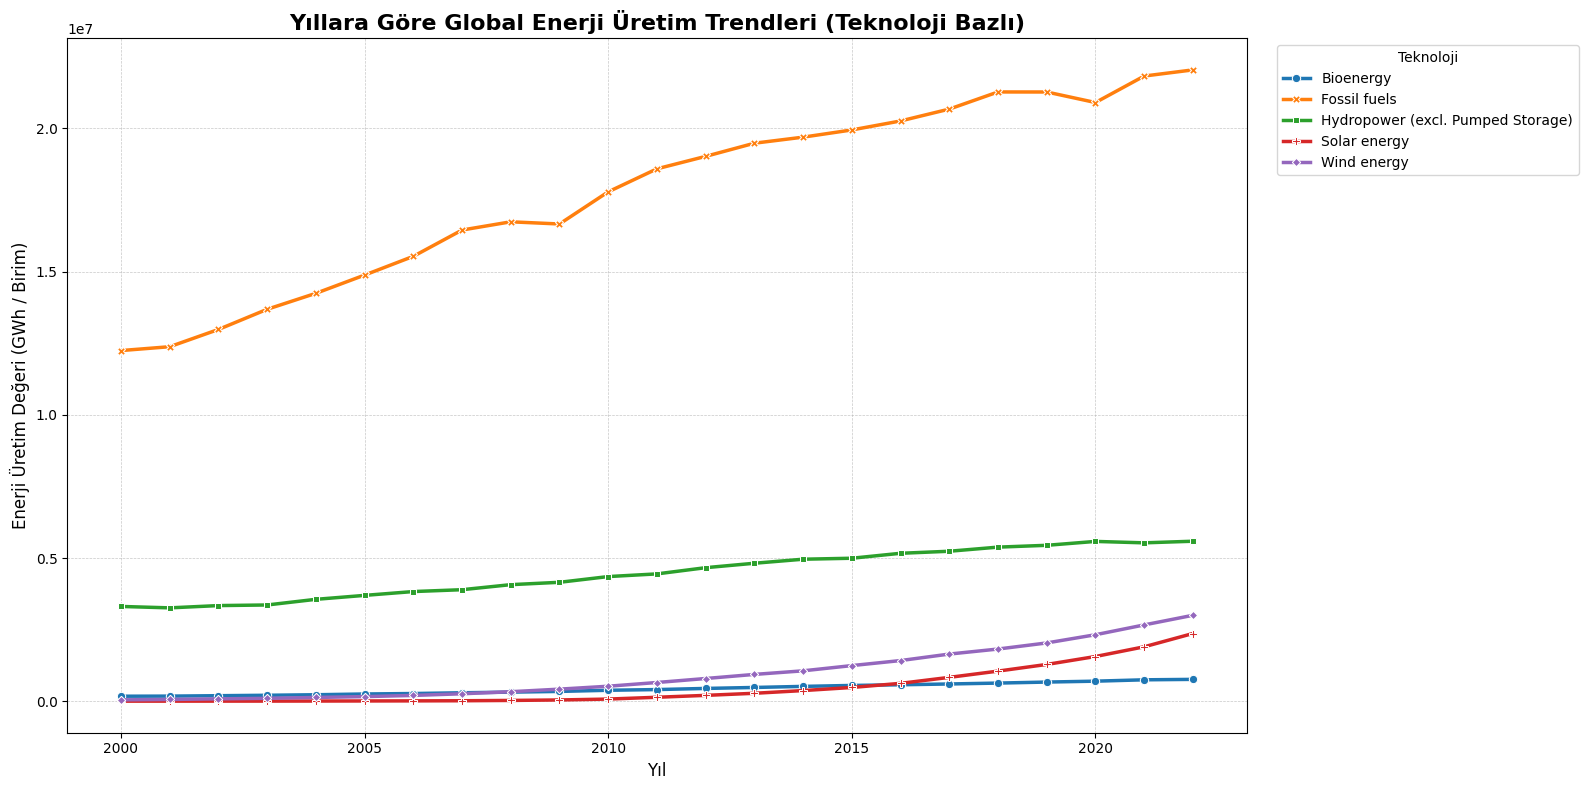

In [24]:

plt.figure(figsize=(16, 8))

sns.lineplot(
    data=trend_data,
    x='Year',
    y='Value',
    hue='Technology',  # Çizgileri teknolojiye göre renklendir
    style='Technology', # Çizgi tiplerini de farklılaştır (okumayı kolaylaştırır)
    markers=True,       # Noktaları belirginleştir
    dashes=False,
    linewidth=2.5
)


plt.title('Yıllara Göre Global Enerji Üretim Trendleri (Teknoloji Bazlı)', fontsize=16, fontweight='bold')
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Enerji Üretim Değeri (GWh / Birim)', fontsize=12)
plt.legend(title='Teknoloji', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.show()

Küresel Enerji Trend Analizi (2000-2022)

"Veriler, fosil yakıtların küresel üretimde baskın liderliğini koruduğunu, ancak 2020 pandemisiyle belirgin bir kırılma yaşadığını göstermektedir. Yenilenebilir kanatta ise Hidroelektrik doygunluğa ulaşıp yatay seyrederken; Rüzgar ve özellikle Güneş enerjisi eksponansiyel bir büyüme trendi yakalamıştır. Bu tablo, küresel enerji dönüşümünün hızlandığını ancak fosil bağımlılığının henüz aşılamadığını kanıtlamaktadır."

# SON 10 YILIN YENİLENEBİLİR ENERJİ LİDERLERİ



In [26]:
# 1. Yenilenebilir Enerji Kaynaklarını Tanımlayalım
# Veri setindeki tam isimleri kullanıyoruz. Fosil yakıtlar ve Nükleer hariç.

renewable_techs = [
    'Hydropower (excl. Pumped Storage)',
    'Wind energy',
    'Solar energy',
    'Bioenergy',
    'Geothermal energy',
    'Marine energy'
]

In [38]:
# 2. Veri Filtreleme
# Kriterler: (Yıl >= 2013) VE (Teknoloji = Yenilenebilir) VE (ISO2 dolu = Sadece Ülkeler)
mask = (
    (df_final['Year'] >= 2013) &
    (df_final['Year'] <= 2022) &
    (df_final['ISO2'].notnull()) &
    (df_final['Technology'].isin(renewable_techs))
)

df_top10_data = df_final[mask]

# 3. Ülkelere Göre Toplam Üretimi Hesaplama
top_countries = df_top10_data.groupby('Country')['Value'].sum().sort_values(ascending=False).head(10).reset_index()
top_countries['Value_Million'] = top_countries['Value'] / 1000000

/tmp/ipython-input-765566093.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


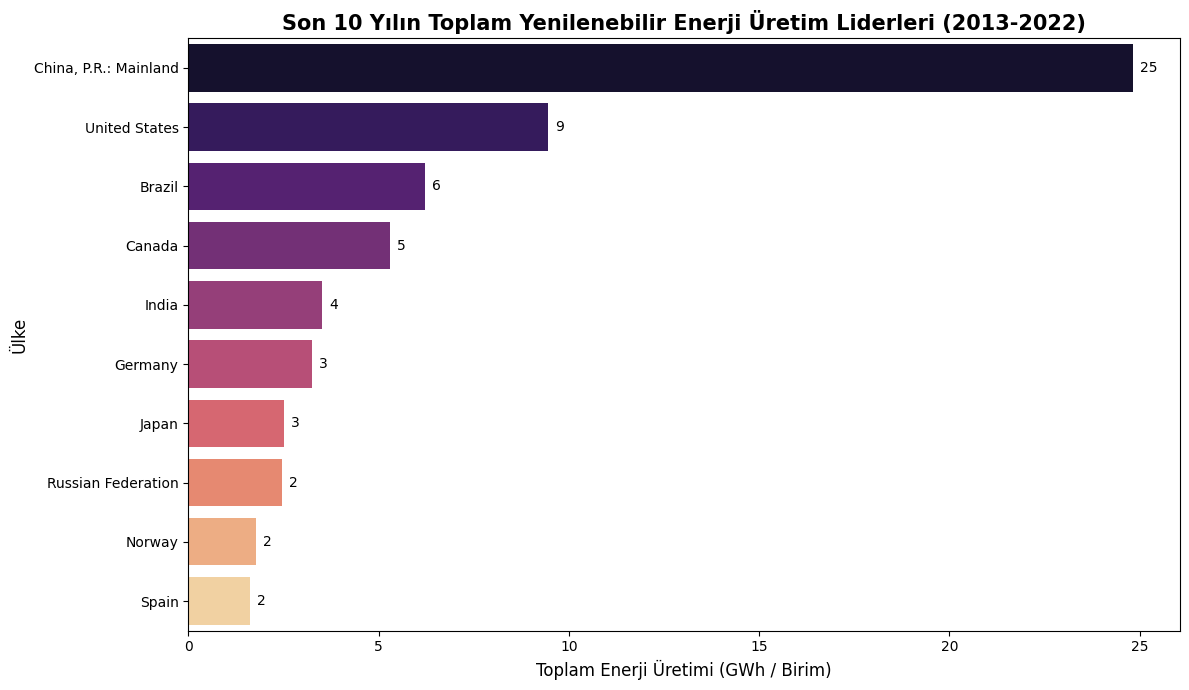

Top 10 Ülke Listesi:
                 Country         Value  Value_Million
0  China, P.R.: Mainland  2.482026e+07      24.820264
1          United States  9.455615e+06       9.455615
2                 Brazil  6.209696e+06       6.209696
3                 Canada  5.297014e+06       5.297014
4                  India  3.526473e+06       3.526473
5                Germany  3.258963e+06       3.258963
6                  Japan  2.527148e+06       2.527147
7     Russian Federation  2.469156e+06       2.469156
8                 Norway  1.775210e+06       1.775210
9                  Spain  1.611705e+06       1.611705


In [40]:
# 4. Görselleştirme
plt.figure(figsize=(12, 7))

# Seaborn barplot
ax = sns.barplot(
    data=top_countries,
    x='Value_Million',
    y='Country',
    palette='magma'
)

plt.title('Son 10 Yılın Toplam Yenilenebilir Enerji Üretim Liderleri (2013-2022)', fontsize=15, fontweight='bold')
plt.xlabel('Toplam Enerji Üretimi (GWh / Birim)', fontsize=12)
plt.ylabel('Ülke', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=5, fontsize=10)

plt.tight_layout()
plt.show()


print("Top 10 Ülke Listesi:")
print(top_countries)

Son 10 yıllık (2013-2022) kümülatif veriler incelendiğinde, Çin'in 24.8 Milyon GWh’lik üretim hacmiyle, en yakın rakibi ABD’yi neredeyse üçe katlayarak küresel yenilenebilir enerji piyasasını tek başına domine ettiği görülmektedir. Listede Brezilya, Kanada ve Norveç gibi ülkelerin üst sıralarda yer alması, bu coğrafyaların zengin hidroelektrik potansiyellerini etkin kullandığını gösterirken; Almanya ve İspanya'nın varlığı, Avrupa'nın teknoloji ve politika odaklı (Rüzgar/Güneş) yeşil dönüşüm stratejisinin başarısını kanıtlamaktadır. Tablo, küresel yenilenebilir enerji üretiminin ağırlık merkezinin açık ara farkla Asya'ya kaydığını ve Çin'in bu alanda tartışmasız bir 'süper güç' olduğunu ortaya koymaktadır.

# ÜLKE BAZLI TEKNOLOJİ KIRILIMI

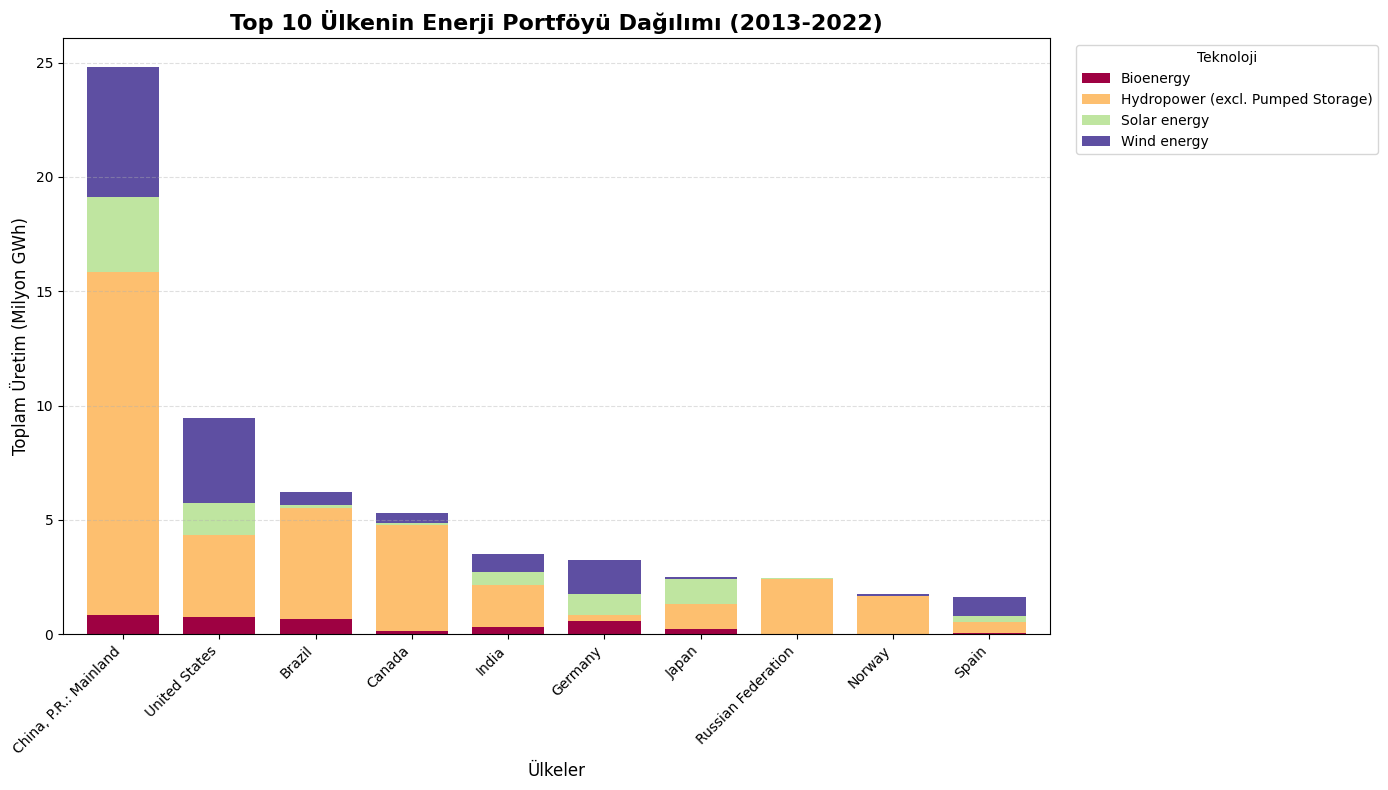

In [41]:
# 1. Top 10 Ülke Listesini Alalım (Sıralamayı koruyarak)
top_10_list = top_countries['Country'].tolist()

# 2. Ana veriyi bu ülkelere ve yenilenebilir kaynaklara göre filtreleyelim
df_breakdown = df_final[
    (df_final['Country'].isin(top_10_list)) &
    (df_final['Technology'].isin(renewable_techs)) &
    (df_final['Year'] >= 2013) &
    (df_final['Year'] <= 2022)
]

# 3. Pivot Tablo Oluşturma (Grafik için veriyi matris haline getirme)
# Satırlar: Ülkeler, Sütunlar: Teknolojiler, Değerler: Toplam Üretim
pivot_df = df_breakdown.groupby(['Country', 'Technology'])['Value'].sum().unstack()

# 4. Sıralamayı Top 10 listesindeki sıraya göre düzeltme
pivot_df = pivot_df.loc[top_10_list]

# 5. Milyon Cinsine Çevirme
pivot_df = pivot_df / 1000000

# 6. Grafik Çizimi (Stacked Bar)
ax = pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='Spectral',
    width=0.75
)

plt.title('Top 10 Ülkenin Enerji Portföyü Dağılımı (2013-2022)', fontsize=16, fontweight='bold')
plt.xlabel('Ülkeler', fontsize=12)
plt.ylabel('Toplam Üretim (Milyon GWh)', fontsize=12)
plt.legend(title='Teknoloji', bbox_to_anchor=(1.02, 1), loc='upper left') # Lejant dışarıda
plt.xticks(rotation=45, ha='right') # Ülke isimlerini eğik yaz
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()

Top 10 Ülke Enerji Portföyü Analizi (2013-2022)
Bu grafik, ülkelerin yenilenebilir enerji stratejilerinin coğrafi ve teknolojik olarak ikiye ayrıldığını net bir şekilde göstermektedir:

Hidroelektrik Devleri (Coğrafi Avantaj): Çin, Brezilya, Kanada ve Norveç'in üretiminde turuncu bloğun (Hidroelektrik) hakimiyeti görülmektedir. Bu ülkeler, doğal su kaynaklarını kullanarak üretim yapmaktadır; özellikle Norveç neredeyse %100 hidroelektrik bağımlısıdır.

Teknoloji Odaklı Dönüşüm (Almanya Örneği): Listenin en dikkat çekici ülkesi Almanya'dır. Hidroelektrik potansiyeli (turuncu kısım) çok düşük olmasına rağmen; Rüzgar (Mor), Güneş (Yeşil) ve Biyoenerji (Kırmızı) yatırımlarıyla ilk 10'a girmeyi başarmıştır. Bu durum, Almanya'nın başarısının coğrafyadan değil, yeşil enerji politikalarından kaynaklandığını kanıtlar.

Dengeli Dağılım (ABD): Çin hacim olarak lider olsa da, ABD hem hidroelektrik hem de rüzgar enerjisinde (mor blok) dengeli ve güçlü bir portföy sergilemektedir.

----

# 🇹🇷 TÜRKİYE ÖZEL ANALİZİ 🇹🇷

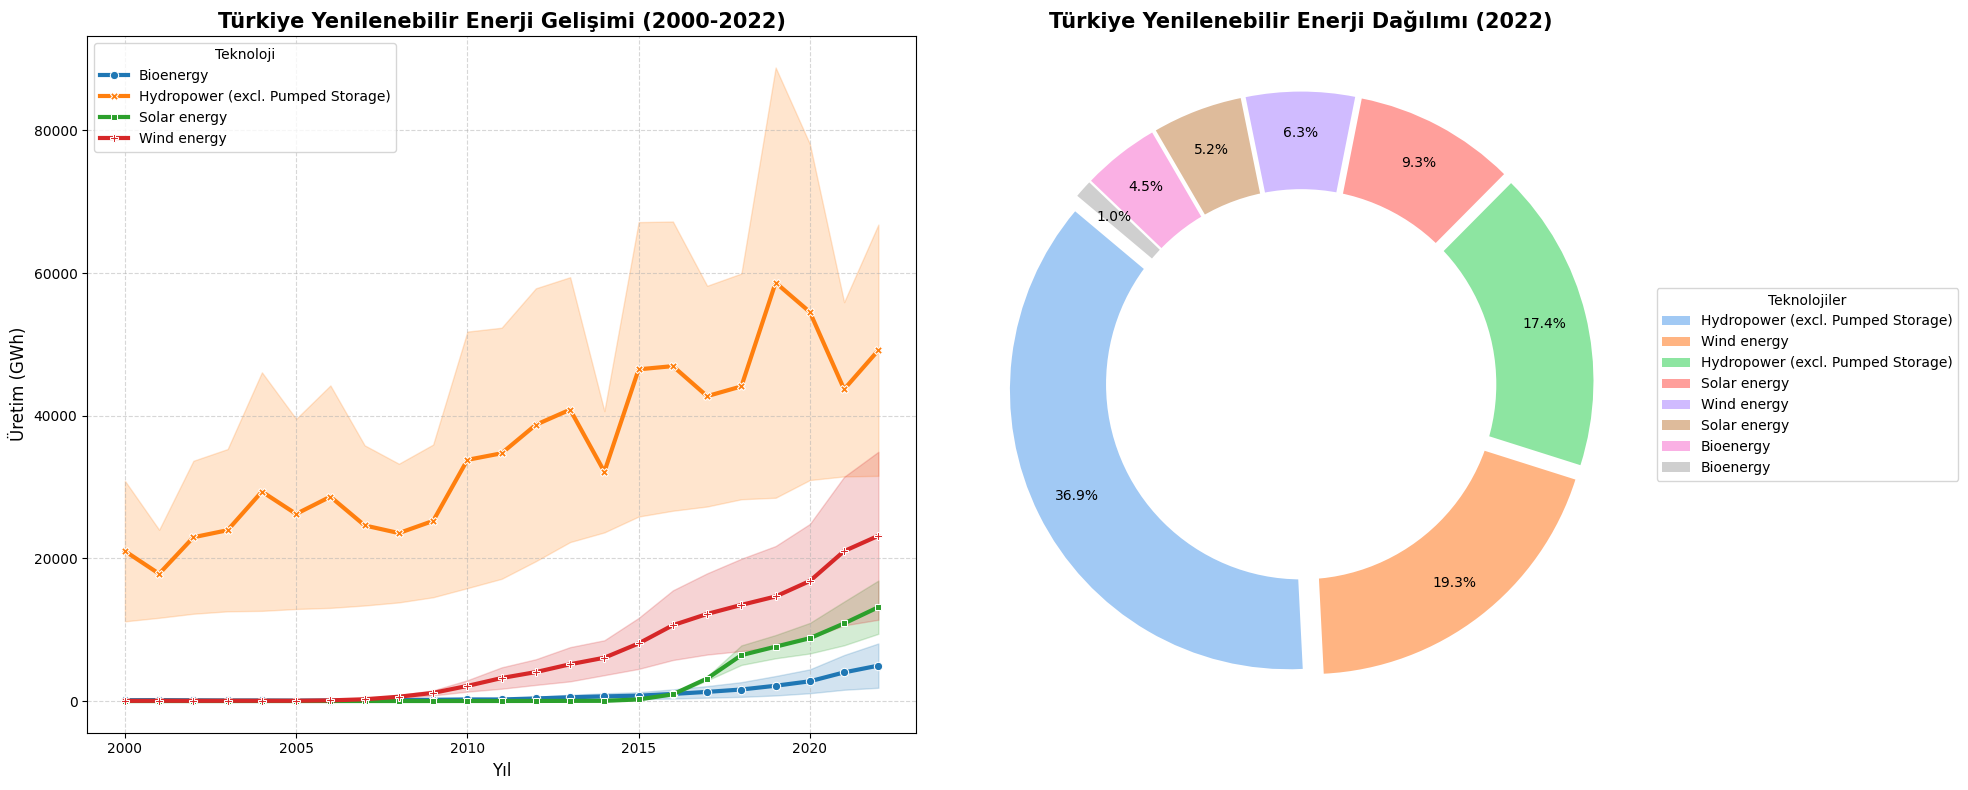

In [44]:

# 1. Veriyi Hazırlama
# ISO3 kodu 'TUR' olan verileri ve sadece yenilenebilir teknolojileri seçiyoruz.

df_turkey = df_final[
    (df_final['ISO3'] == 'TUR') &
    (df_final['Technology'].isin(renewable_techs))
]

# 2. Grafik Alanı Oluşturma (Yan yana iki grafik)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# GRAFİK 1: ZAMAN SERİSİ (Yıllara Göre Gelişim)
sns.lineplot(
    data=df_turkey,
    x='Year',
    y='Value',
    hue='Technology',
    style='Technology',
    markers=True,
    dashes=False,
    linewidth=3,
    ax=axes[0]
)

axes[0].set_title('Türkiye Yenilenebilir Enerji Gelişimi (2000-2022)', fontsize=15, fontweight='bold')
axes[0].set_ylabel('Üretim (GWh)', fontsize=12)
axes[0].set_xlabel('Yıl', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)
# Lejantı grafik içine, boş bir yere koyalım
axes[0].legend(title='Teknoloji', loc='upper left')


# GRAFİK 2: 2022 YILI ENERJİ PASTASI (Dağılım)

turkey_2022 = df_turkey[df_turkey['Year'] == 2022].sort_values(by='Value', ascending=False)

# Pie Chart
axes[1].pie(
    turkey_2022['Value'],
    labels=None, # Etiketleri lejanta koyacağız, burası karışmasın
    autopct='%1.1f%%', # Yüzdelik dilimleri göster
    startangle=140,
    colors=sns.color_palette('pastel'), # Yumuşak renkler
    pctdistance=0.85, # Yüzdeleri merkeze değil kenara yakın yaz
    explode=[0.05] * len(turkey_2022) # Dilimleri hafifçe ayır
)

# (Donut Chart)
centre_circle = plt.Circle((0,0),0.70,fc='white')
axes[1].add_artist(centre_circle)

axes[1].set_title('Türkiye Yenilenebilir Enerji Dağılımı (2022)', fontsize=15, fontweight='bold')
axes[1].legend(turkey_2022['Technology'], title="Teknolojiler", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

Türkiye Yenilenebilir Enerji Analizi (2000-2022)
Grafikler incelendiğinde Türkiye'nin enerji stratejisinde üç ana dönem ve trend öne çıkmaktadır:

Hidroelektriğin Hakimiyeti ve İklimsel Kırılganlık (Turuncu Çizgi): Türkiye'nin yenilenebilir enerji omurgasını açık ara Hidroelektrik oluşturmaktadır. Ancak grafik, bu kaynağın yağış rejimine (kuraklık vb.) ne kadar bağımlı olduğunu kanıtlayan zikzaklı bir yapıdadır. 2014 ve 2021 yıllarındaki keskin düşüşler, sadece suya dayalı bir sistemin riskli olabileceğini göstermektedir.

Rüzgarın İstikrarlı Yükselişi (Kırmızı Çizgi): 2009 yılından itibaren devreye giren Rüzgar Enerjisi, hidroelektriğin aksine dalgalanmadan, son derece kararlı ve doğrusal bir büyüme trendi yakalamıştır. 2022 itibarıyla Türkiye'nin en büyük ikinci yenilenebilir kaynağı konumuna yerleşmiştir.

Güneş Devrimi (Yeşil Çizgi): Grafikteki en dikkat çekici detay Güneş Enerjisi'dir. 2016 yılına kadar neredeyse sıfır noktasındayken, bu tarihten sonra dikey bir sıçrama yaparak sisteme dahil olmuştur. İvmesi rüzgardan çok daha diktir; bu da Türkiye'nin son yıllardaki yatırım odağını tamamen güneşe çevirdiğini kanıtlar.